In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("real_estate_data.csv")
print(df.head())

  property_id  property_type    location  bedrooms  bathrooms  area_sqft  \
0        P001  Single Family    Downtown         4        3.0       2200   
1        P002          Condo     Suburbs         2        2.0       1100   
2        P003      Townhouse     Midtown         3        2.5       1650   
3        P004  Single Family  Beachfront         5        4.0       3200   
4        P005          Condo    Downtown         1        1.0        750   

   listing_price  sold_price  days_on_market      agent_name   sale_date  \
0         450000      435000              45  Anna Rodriguez  2025-01-15   
1         280000      275000              30   Mark Thompson  2025-01-18   
2         385000      380000              22  Anna Rodriguez  2025-01-22   
3         890000      875000              60       Lisa Chen  2025-01-25   
4         195000      190000              18   Mark Thompson  2025-02-01   

  property_status  year_built  parking_spaces  
0            Sold        2015         

In [64]:
#1	Price Per Square Foot	Column creation, sorting

df['price_per_sqft'] = df['sold_price'] / df['area_sqft']





In [65]:
#2	Profit/Loss Calculation	Math operations, aggregation

df['profit_lost'] = df['sold_price'] - df['listing_price']




df[['property_type','sold_price','listing_price','profit_lost']]




,property_type,sold_price,listing_price,profit_lost
0,Single Family,435000,450000,-15000
1,Condo,275000,280000,-5000
2,Townhouse,380000,385000,-5000
3,Single Family,875000,890000,-15000
4,Condo,190000,195000,-5000
5,Single Family,415000,420000,-5000
6,Townhouse,310000,320000,-10000
7,Condo,505000,520000,-15000
8,Single Family,385000,395000,-10000
9,Townhouse,370000,375000,-5000


In [66]:

#3	Avg Days on Market by Type	GroupBy, mean


avg_dom = ( 
    df.groupby('property_type')['days_on_market']
    .mean()
    .reset_index()
    .rename(columns={'days_on_market':"avg_days_on_market"})
)


avg_dom



,property_type,avg_days_on_market
0,Condo,27.615385
1,Single Family,50.571429
2,Townhouse,35.769231


In [67]:
avg_dom_sorted = avg_dom.sort_values('avg_days_on_market')

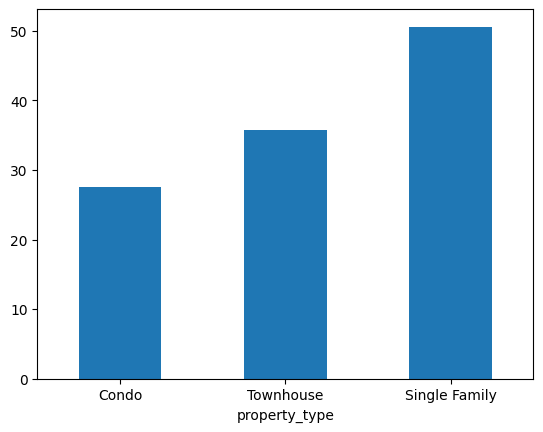

In [68]:
avg_dom_sorted.plot(
    kind='bar',
    x='property_type',
    y='avg_days_on_market',
    legend=False,

)
plt.xticks(rotation=0)
plt.show()

In [69]:
#5	Agent Performance	GroupBy, sum, ranking


rank_agent = df.groupby('agent_name')['sold_price'].sum().reset_index()
rank_agent['rank'] = rank_agent['sold_price'].rank(ascending=False)


sorted_rank_agent = rank_agent.sort_values(by='rank')

sorted_rank_agent





,agent_name,sold_price,rank
2,Lisa Chen,6660000,1.0
0,Anna Rodriguez,3988000,2.0
3,Mark Thompson,3375000,3.0
1,James Wilson,2665000,4.0


In [70]:
#6	Percentage Discount	Calculated columns, filtering
#Find properties with discount greater than 5%.
df['percent_discount'] = (df['listing_price'] - df['sold_price']) / df['listing_price'] * 100





In [71]:
df[['percent_discount','listing_price','sold_price']]



more_than_5_discount = df[df['percent_discount'] > 5]


print(f'their is {len(more_than_5_discount)} property with more than 5% discount')




their is 0 property with more than 5% discount


In [72]:
df[['percent_discount','listing_price','sold_price']]

,percent_discount,listing_price,sold_price
0,3.333333,450000,435000
1,1.785714,280000,275000
2,1.298701,385000,380000
3,1.685393,890000,875000
4,2.564103,195000,190000
5,1.190476,420000,415000
6,3.125000,320000,310000
7,2.884615,520000,505000
8,2.531646,395000,385000
9,1.333333,375000,370000


In [73]:
#7	Property Age Calculation	Year operations, groupby


df['property_age']  = 2025 - df['year_built']

df[['property_age','year_built']].head(4)



,property_age,year_built
0,10,2015
1,7,2018
2,5,2020
3,13,2012


In [74]:
property_group = df.groupby('property_type').agg(property_age=(
    'property_age',"mean"),
year_built = ('year_built','count'))


property_group


,property_age,year_built
property_type,,
Condo,4.769231,13
Single Family,10.500000,14
Townhouse,6.384615,13


In [ ]:
location_statistic = df.groupby('location').agg(
sold_price_mean=('sold_price', 'mean'),
sold_price_max=('sold_price', 'max'),
sold_price_min=('sold_price', 'min'),
avg_bedrooms = ('bedrooms','mean'),
avg_bathrooms = ('bathrooms','mean'),
avg_area_sqft = ('area_sqft','mean'),


).sort_values(by='sold_price',ascending=False)

location_statistic

KeyError: 'sold_price'